<a href="https://colab.research.google.com/github/hH-13/wangernum/blob/main/basicish/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### k-nn classification


**Concept** :
* In a single sentence, nearest neighbor classifiers are defined by their characteristic of classifying unlabeled examples by assigning them the class of similar labeled examples. Despite the simplicity of this idea, nearest neighbor methods are extremely powerful.

* The k-NN algorithm gets its name from the fact that it uses information about an example's k-nearest neighbors to classify unlabeled examples. The letter k is a variable term implying that any number of nearest neighbors could be used.

**Standard applications:**
* OCR and facial recognition
* Recommendation systems
* Identifying patterns in genetic data

**When to use and not to use:**
* Where relationships among the features and the target classes are numerous, complicated, or extremely difficult to understand, yet the items of similar class type tend to be fairly homogeneous.




---



**Strengths**
* Simple and effective
* Makes no assumptions about the underlying data distribution
* Fast training phase

**Weaknesses**
* If the data is noisy and thus no clear distinction exists among the groups, the nearest neighbor algorithms may struggle to identify the class boundaries.
* Does not produce a model, limiting the ability to understand how the features are related to the class
* Requires selection of an appropriate k
* Slow classification phase
* Nominal features and missing data require additional processing



---


* The decision of how many neighbors to use for k-NN determines how well the model will generalize to future data.

* Choosing a large k reduces the impact or variance caused by noisy data, but can bias the learner so that it runs the risk of ignoring small, but important patterns.

* One common practice is to begin with k equal to the square root of the number of training examples. However, such rules may not always result in the single best k. An alternative approach is to test several k values on a variety of test datasets and choose the one that delivers the best classification performance.

* A less common, but interesting solution to this problem is to choose a larger k, but apply a weighted voting process in which the vote of the closer neighbors is considered more authoritative than the vote of the far away neighbors.


--------
**Model evaluation metrics**

* The **accuracy** (also called success rate) is the proportion that represents the number of true positives and true negatives, divided by the total number of all predictions.  But if the data is unevenly distributed, you can't rely on it as just by pure luck you can get very high values.

* **Error rate** or the proportion of the incorrectly classified examples is one minus the accuracy

* The **precision** (also known as the positive predictive value) is defined as the proportion of positive examples that are truly positive; in other words, when a model predicts the positive class, how often is it correct? A precise model will only predict the positive class in cases that are very likely to be positive. It will be very trustworthy.

* In the case of the SMS spam filter, high precision means that the model is able to carefully target only the spam while ignoring the ham.

* **Recall** is a measure of how complete the results are. It the same as sensitivity.  A model with a high recall captures a large portion of the positive examples, meaning that it has wide breadth.
For example, disease prediction.

* The **F1 Score** is the 2 * ((precision*recall)/(precision+recall)).

* It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution

* The **support** is the number of samples of the true response that lie in that class.

https://medium.com/data-science-in-your-pocket/calculating-precision-recall-for-multi-class-classification-9055931ee229



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# https://www.kaggle.com/uciml/pima-indians-diabetes-database
# df = pd.read_csv('diabetes.csv')
df = pd.read_csv('https://github.com/hH-13/wangernum/raw/refs/heads/main/basicish/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [5]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_accuracy =[] # when you fit the model to train data
test_accuracy =[] # when you predict on test data and compare with actual data labels

for i in range(1,9):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy.append(knn.score(X_train, y_train))

    #Compute accuracy on the test set
    y_pred= knn.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    test_accuracy.append(ac)

    # alternatively we can use the code below

    #it calls predict and then calls accuracy_score.
    #test_accuracy.append(knn.score(X_test, y_test))

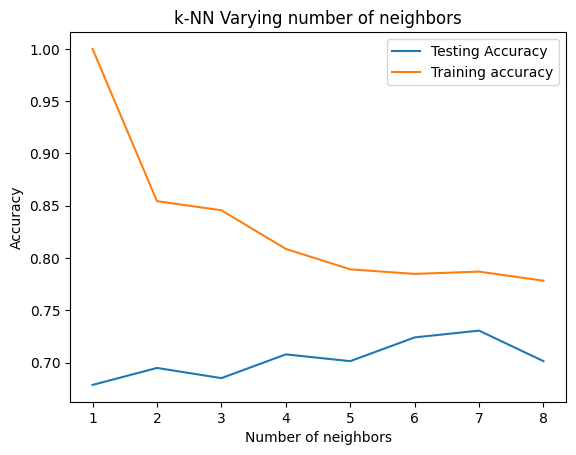

In [6]:
neighbors = np.arange(1,9)

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [7]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7305194805194806

In [8]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[165,  36],
       [ 47,  60]])

In [15]:
#post deployment on new data

# X_test_new=pd.read_csv('diabetes_new.csv') #put few rows in this file without Y
X_test_new=X_test[:69]

y_pred_new=knn.predict(X_test_new)
print(y_pred_new)

[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1
 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0]


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test[:69],y_pred_new))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        48
           1       0.40      0.48      0.43        21

    accuracy                           0.62        69
   macro avg       0.57      0.58      0.58        69
weighted avg       0.64      0.62      0.63        69



###Decision Trees classification


**Concept** :
* Decision tree learners are powerful classifiers, which utilize a tree structure to model the relationships among the features and the potential outcomes.  Divide and conquer heuristic

* A great benefit of decision tree algorithms is that the flowchart-like tree structure is not necessarily exclusively for the learner's internal use. After the model is created, many decision tree algorithms output the resulting structure in a human-readable format. This provides tremendous insight into how and why the model works or doesn't work well for a particular task.


* Decision trees are built using a heuristic called recursive partitioning. This approach is also commonly known as divide and conquer because it splits the data into subsets, which are then split repeatedly into even smaller subsets, and so on and so forth until the process stops when the algorithm determines the data within the subsets are sufficiently homogenous, or another stopping criterion has been met.

* At first, the root node represents the entire dataset, since no splitting has transpired. Next, the decision tree algorithm must choose a feature to split upon; ideally, it chooses the feature most predictive of the target class.

* The examples are then partitioned into groups according to the distinct values of this feature, and the first set of tree branches are formed.

* Working down each branch, the algorithm continues to divide and conquer the data, choosing the best candidate feature each time to create another decision node, until a stopping criterion is reached.




---



**Choosing the Best split**
* The first challenge that a decision tree will face is to identify which feature to split upon.

* We look for a way to split the data such that the resulting partitions contained examples primarily of a single class of target variable.

* The degree to which a subset of examples contains only a single class is known as purity, and any subset composed of only a single class is called 100% pure.

**Entropy is a measure of purity**
* Sets with high Entropy are very diverse and provide little information about other items that may also belong in the set, as there is no apparent commonality.  The decision tree hopes to find splits that reduce entropy, ultimately increasing homogeneity within the groups.

* The **information gain** for a feature F is calculated as the difference between the entropy in the segment before the split (S1) and the partitions resulting from the split (S2)

* Decision trees use information gain for splitting on numeric features as well. To do so, a common practice is to test various splits that divide the values into groups greater than or less than a numeric threshold.

* This reduces the numeric feature into a two-level categorical feature that allows information gain to be calculated as usual. The numeric cut point yielding the largest information gain is chosen for the split.

* A decision tree can continue to grow indefinitely, choosing splitting features and dividing the data into smaller and smaller partitions until each example is perfectly classified or the algorithm runs out of features to split on.

* However, if the tree grows overly large, many of the decisions it makes will be overly specific and the model will be overfitted to the training data. The process of pruning a decision tree involves reducing its size such that it generalizes better to unseen data

* One solution to this problem is to stop the tree from growing once it reaches a certain number of decisions or when the decision nodes contain only a small number of examples. This is called early stopping or pre-pruning the decision tree.

* An alternative, called post-pruning, involves growing a tree that is intentionally too large and pruning leaf nodes to reduce the size of the tree to a more appropriate level.
Pruning the tree later on allows the algorithm to be certain that all the important data structures were discovered.


----------
**Gini**

* Both Gini Impurity and Entropy are criteria to split a node in a decision tree. They are standard metrics to compute “impurity”. They guide to split a node in the decision tree only based on the information that exists at that node.

* Gini is intended for continuous attributes, and Entropy for attributes that occur in classes.

* Entropy may be a little slower to compute.

*  Learn more at https://www.geeksforgeeks.org/gini-impurity-and-entropy-in-decision-tree-ml/

**Standard applications**
* Credit scoring models in which the criteria that causes an applicant to be rejected need to be clearly documented and free from bias

* Marketing studies of customer behavior such as satisfaction or churn, which will be shared with management or advertising agencies

* Diagnosis of medical conditions based on laboratory measurements, symptoms, or the rate of disease progression

**When to use and not to use**
* In fact, decision trees are perhaps the single most widely used machine learning technique, and can be applied to model almost any type of data—often with excellent out-of-the-box applications.

* This said, in spite of their wide applicability, it is worth noting some scenarios where trees may not be an ideal fit. One such case might be a task where the data has a large number of nominal features with many levels or it has a large number of numeric features.

**Strengths**
* An all-purpose classifier that does well on most problems
* Highly automatic learning process, which can handle numeric or nominal features, as well as missing data
* Excludes unimportant features
* Can be used on both small and large datasets
* Results in a model that can be interpreted without a mathematical background (for relatively small trees)
* More efficient than other complex models

**Weaknesses**
* Decision tree models are often biased toward splits on features having a large number of levels
* It is easy to overfit or underfit the model
* Can have trouble modeling some relationships due to reliance on axis-parallel splits
* Small changes in the training data can result in large changes to decision logic
* Large trees can be difficult to interpret and the decisions they make may seem counterintuitive





---



In [ ]:
# Simple example
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

df = pd.read_excel('fit.xlsx')
print(df)

from sklearn.model_selection import train_test_split

y = df['type']
x = df.drop(['type'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

parameters = {'criterion':('gini', 'entropy')
              }

tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
print(model.criterion)

   Age  Lot_of_Pizza  Exercise   type
0   25             1         1    Fit
1   29             1         1    Fit
2   31             0         1    Fit
3   33             0         1  Unfit
4   28             0         1    Fit
5   33             1         0  Unfit
6   32             1         0  Unfit
7   25             1         1    Fit
8   29             1         0  Unfit
9   31             0         1    Fit


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


gini


In [ ]:
score = model.score(X_test, y_test)
score

1.0

In [ ]:
X_train, y_train

(   Age  Lot_of_Pizza  Exercise
 5   33             1         0
 0   25             1         1
 7   25             1         1
 2   31             0         1
 3   33             0         1
 6   32             1         0
 9   31             0         1
 8   29             1         0,
 5    Unfit
 0      Fit
 7      Fit
 2      Fit
 3    Unfit
 6    Unfit
 9      Fit
 8    Unfit
 Name: type, dtype: object)

In [ ]:
X_test, y_test

(   Age  Lot_of_Pizza  Exercise
 4   28             0         1
 1   29             1         1,
 4    Fit
 1    Fit
 Name: type, dtype: object)

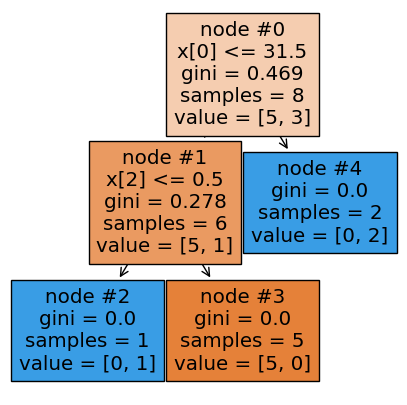

In [ ]:
# decision tree visualization
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(5,5))
tree.plot_tree(model, filled=True, node_ids=True)
plt.show()

In [ ]:
# Bigger example
import numpy as np
import pandas as pd

# Mushroom dataset by Jeff Schlimmer of Carnegie Mellon University.
# The raw dataset is available freely at the UCI Machine Learning Repository
# (https://www.kaggle.com/uciml/mushroom-classification).

df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
from sklearn.model_selection import train_test_split

y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x)
y = pd.get_dummies(y)
print(x.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   e       8124 non-null   uint8
 1   p       8124 non-null   uint8
dtypes: uint8(2)
memory usage: 16.0 KB
None


In [ ]:
x

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
y

,e,p
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
8119,1,0
8120,1,0
8121,1,0
8122,0,1


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

parameters = {'criterion':('gini', 'entropy'),
              'min_samples_split':[2,3,4,5],
              'max_depth':[9,10,11,12] # try with 3,4
              }

tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
print(model.criterion)
print(model.min_samples_split)
print(model.max_depth)

gini
2
9


In [ ]:
y_pred=model.predict(X_test)
score = model.score(X_test, y_test)
print(score)
y_pred

1.0


array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=uint8)

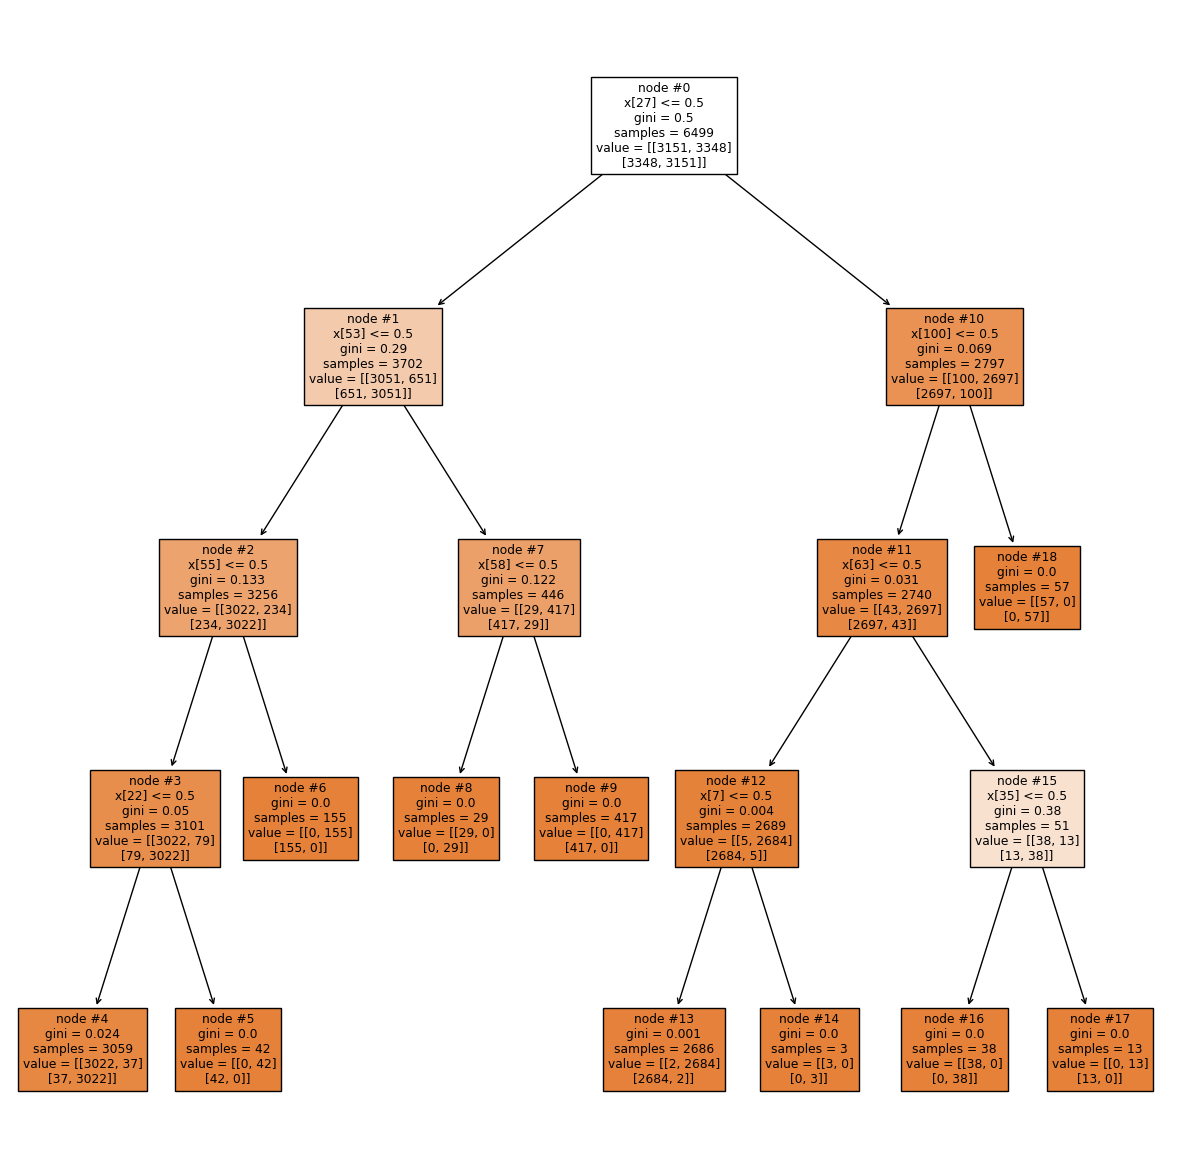

In [ ]:
# decision tree visulaization
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,15))
tree.plot_tree(model, filled=True, node_ids=True)
plt.show()

###Naive Bayes Classification


Considering that a person has fever continuosly for 48 hrs, what is the probability that he or she has corona?

A - having corona
B - 48 hrs fever

P[A|B] - ???

P[A]= probability of corona in population - positivity rate
P[B]= probability of 48 hrs fever in population - take sample of n persons and find

P[B|A]=probabilty of 48 hrs fever if corona is there - take sample of n persons with corona and find


**Concept** :
* The technique descended from the work of the 18th century mathematician Thomas Bayes, who developed foundational principles to describe the probability of events, and how probabilities should be revised in the light of additional information. These principles formed the foundation for what are now known as Bayesian methods.

* Classifiers based on Bayesian methods utilize training data to calculate an observed probability of each outcome based on the evidence provided by feature values. When the classifier is later applied to unlabeled data, it uses the observed probabilities to predict the most likely class for the new features.

* Standard applications
Text classification, such as junk e-mail (spam) filtering
Intrusion or anomaly detection in computer networks
Diagnosing medical conditions given a set of observed symptoms




---



**When to use and not to use**
* Typically, Bayesian classifiers are best applied to problems in which the information from numerous attributes should be considered simultaneously in order to estimate the overall probability of an outcome.
* While many machine learning algorithms ignore features that have weak effects, Bayesian methods utilize all the available evidence to subtly change the predictions.
* If large number of features have relatively minor effects, taken together, their combined impact could be quite large.

**Strengths**
* Simple, fast, and very effective
* Does well with noisy and missing data
* Requires relatively few examples for training, but also works well with very large numbers of examples
*Easy to obtain the estimated probability for a prediction


**Weaknesses**
* Relies on an often-faulty assumption of equally important and independent features
* Not ideal for datasets with many numeric features
* Estimated probabilities are less reliable than the predicted classes

**Basic concepts**
* Summarized in a single sentence, Bayesian probability theory is rooted in the idea that the estimated likelihood of an event, or a potential outcome, should be based on the evidence at hand across multiple trials, or opportunities for the event to occur.

* The Naive Bayes algorithm is named as such because it makes some "naive" assumptions about the data. In particular, Naive Bayes assumes that all of the features in the dataset are equally important and independent.  This algorithm performs fairly well even when these assumptions are false.

* One explanation is that it is not important to obtain a precise estimate of probability, so long as the predictions are accurate. Even if the features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability.

* Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

* **Laplace smoothing**: we add 1 to every count so it’s never zero. To balance this, we add the number of possible words to the divisor, so the division will never be greater than 1.


In [ ]:
import numpy as np
import pandas as pd

# https://www.kaggle.com/uciml/pima-indians-diabetes-database
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    X[column] = X[column].replace(0, np.NaN)
    mean = int(X[column].mean(skipna=True))
    X[column] = X[column].replace(np.NaN, mean)

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,
                                                random_state=123, stratify=y)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train

array([[ 2.65418741,  0.99500716,  1.44753734, ..., -0.81115891,
         0.77187564,  0.80819989],
       [-1.12644559, -0.56438389, -0.70228888, ...,  0.14606313,
         0.10446666, -0.94080609],
       [ 0.32764403,  0.50769746,  2.93587857, ...,  2.28573593,
        -0.75017924,  0.30848389],
       ...,
       [-0.83562766, -1.05169359,  0.2899386 , ..., -0.19177994,
        -0.8558775 , -0.85752009],
       [-0.83562766, -0.01209956,  0.45530985, ...,  0.90621005,
        -0.64750094, -0.44109009],
       [-1.12644559,  0.6051594 , -0.61960326, ...,  1.41297466,
        -0.13410941, -0.77423409]])

In [ ]:
inv_X=sc_X.inverse_transform(X_train)
inv_X

array([[ 13.   , 152.   ,  90.   , ...,  26.8  ,   0.731,  43.   ],
       [  0.   , 104.   ,  64.   , ...,  33.6  ,   0.51 ,  22.   ],
       [  5.   , 137.   , 108.   , ...,  48.8  ,   0.227,  37.   ],
       ...,
       [  1.   ,  89.   ,  76.   , ...,  31.2  ,   0.192,  23.   ],
       [  1.   , 121.   ,  78.   , ...,  39.   ,   0.261,  28.   ],
       [  0.   , 140.   ,  65.   , ...,  42.6  ,   0.431,  24.   ]])

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[132  18]
 [ 32  49]]
0.6621621621621622
0.7835497835497836
